# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
airbnb = pd.read_csv('./AB_NYC_2019.csv')
airbnb


,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [156]:
high = airbnb.sort_values('price', ascending=False)
high

,id,name,host_id,host_name,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [48]:
# How many neighbourhood groups / which shows up the most
# Answer: 5, Manhattan

bnb_neighborhood = airbnb[['name', 'neighborhood', 'neighborhood_group']]


neighborhood= bnb_neighborhood.groupby('neighborhood_group').count()
neighborhood

sorted_neighborhood = neighborhood.sort_values('neighborhood', ascending=False)
sorted_neighborhood


,name,neighborhood
neighborhood_group,,
Manhattan,21652,21661
Brooklyn,20098,20104
Queens,5666,5666
Bronx,1090,1091
Staten Island,373,373


In [70]:
# Are private rooms the most popular in Manhattan?
#Answer:NO


bnb_room=airbnb.groupby('room_type').count()
bnb_room[['id']]



,id
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [100]:
# Who are the top 10 busiest hosts based on number of reviews per month?
bnb_hosts= airbnb[['id','host_id', 'host_name', 'number_of_reviews']]
reviewed_hosts = bnb_hosts.groupby('host_name').sum()
# reviewed_hosts
busy_hosts= reviewed_hosts.sort_values('number_of_reviews',ascending=False)
busy_hosts[['number_of_reviews']].head(10)


# bnb_hostname=bnb_hosts.groupby('host_name')
# bnb_hostname
# busy_hosts = bnb_hostname.sort_values('host_name', ascending=False)
# busy_hosts.head(10)

,number_of_reviews
host_name,
Michael,11081
David,8103
John,7223
Jason,6522
Alex,6204
Chris,5028
Anna,4799
Eric,4733
Daniel,4723


In [104]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
# bnb_price=airbnb[['id','neighborhood_group','price']]
group_price = airbnb.groupby(['neighborhood_group']).mean().round(decimals =2)[['price']]
sorted_price = group_price.sort_values('price', ascending=False)
sorted_price

,price
neighborhood_group,
Manhattan,196.88
Brooklyn,124.38
Staten Island,114.81
Queens,99.52
Bronx,87.50


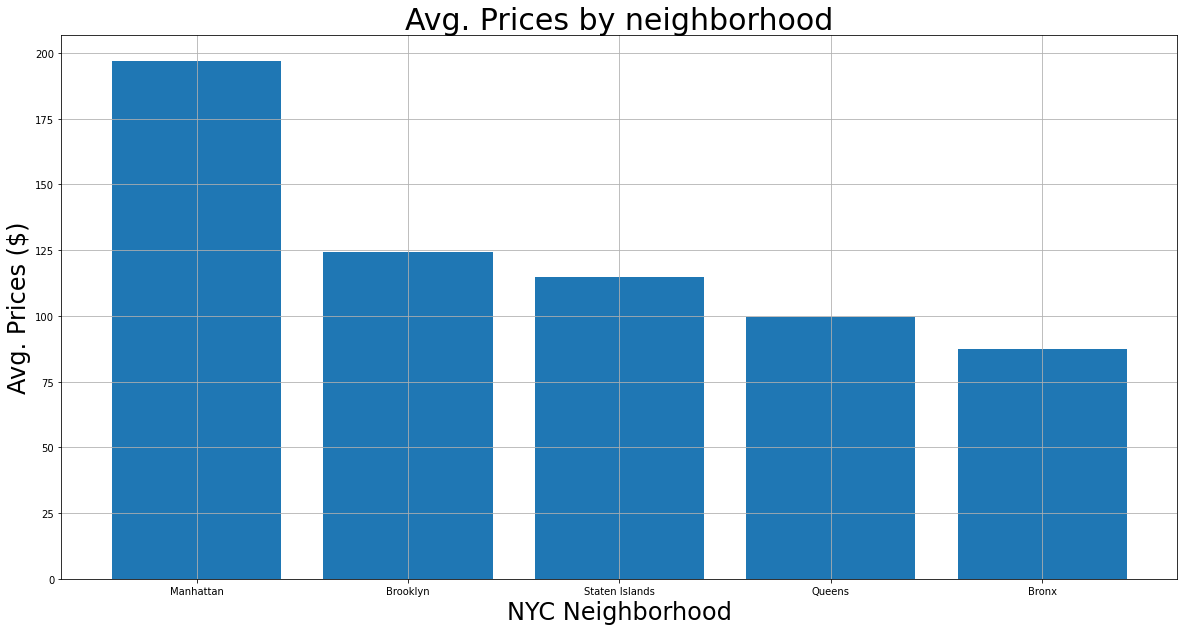

In [215]:
fig, ax = plt.subplots(figsize=(20, 10))
neighbor_group = ['Manhattan', 'Brooklyn', 'Staten Islands', 'Queens', 'Bronx']
price=[196.88, 124.38, 114.81, 99.52, 87.50]

plt.title('Avg. Prices by neighborhood', fontsize=30)
ax.set_xlabel('NYC Neighborhood', fontsize=24)
ax.set_ylabel('Avg. Prices ($)', fontsize=24)
plt.bar(neighbor_group[0:5],price[0:5])
plt.grid(True)
plt.show()


# df=pd.DataFrame({'price':price}, neighbor_group=neighbor_group)
# ax=df.plt.bar(rot=0)


# plt.bar(sorted_price, bins=10, label= 'Prices', color = 'g', alpha=.25)

# plt.xlabel('Neighborhood',fontsize =16,fontname='Times New Roman')
# plt.ylabel('Avg. Prices (US$)',fontsize=16,fontname='Times New Roman')
# plt.title('Average AirBNB prices according to neighborhood', fontsize=32, fontname='Times New Roman')
# plt.show()

In [206]:
# What is the most expensive neighbourhood in each neighbourhood_group
neighborhood = airbnb[['id','neighborhood', 'neighborhood_group', 'price']]
neighborhood_price = airbnb.groupby(['neighborhood_group', 'neighborhood']).mean().round(decimals = 2)[['price']]
sorted_neighborhood = neighborhood_price.sort_values('price', ascending=False)
sorted_neighborhood.head(1)



,,price
neighborhood_group,neighborhood,
Staten Island,Fort Wadsworth,800.0


In [209]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
#answer: JEnny
highest_min = airbnb[['id','host_name', 'minimum_nights', 'price']]
highest_host = highest_min.set_index('host_name')
highest_host

,id,minimum_nights,price
host_name,,,
John,2539,1,149
Jennifer,2595,1,225
Elisabeth,3647,3,150
LisaRoxanne,3831,1,89
Laura,5022,10,80
...,...,...,...
Sabrina,36484665,2,70
Marisol,36485057,4,40
Ilgar & Aysel,36485431,10,115


In [161]:

def Minimum_Cost(row):
    return row['minimum_nights'] * row['price']


highest_host['Minimum_Cost ($)']=highest_host.apply(Minimum_Cost, axis = 1)
highest_min= highest_host.sort_values('Minimum_Cost ($)', ascending=False)
highest_min.head(1)
#Answer:Jenny

,id,minimum_nights,price,Minimum_Cost,Minimum_Cost ($)
host_name,,,,,
Jenny,36056808,180,6500,1170000,1170000


In [182]:
# Who has no (zero) availability with a review count of 100 or more
n_a = airbnb[airbnb['availability_365']==0]

n_a_hundo = n_a[n_a['number_of_reviews']>=100]
n_a_hosts = n_a_hundo.groupby('host_name').count()
most_na = n_a_hosts.sort_values('id', ascending=False)
most_na[['id']].head(1)
#Answer:Michael

,id
host_name,
Michael,5


In [181]:
# If each host rents all of their properties for the night, which 5 make the most that night?
host_income = airbnb.groupby('host_name').sum()
income_total = host_income.sort_values('price', ascending=False)
income_total[['price']].head(5)

,price
host_name,
Sonder (NYC),82795
Blueground,70331
Michael,66895
David,65844
Alex,52563


In [193]:
# When did Danielle from Queens last receive a review?
danielle = airbnb[airbnb['host_name']=='Danielle']
queen_danielle = danielle[danielle['neighborhood_group']=='Queens']
last_review = queen_danielle.sort_values('last_review', ascending=False)
last_review['last_review'].head(1)

#2019-July, 8

22469    2019-07-08
Name: last_review, dtype: object

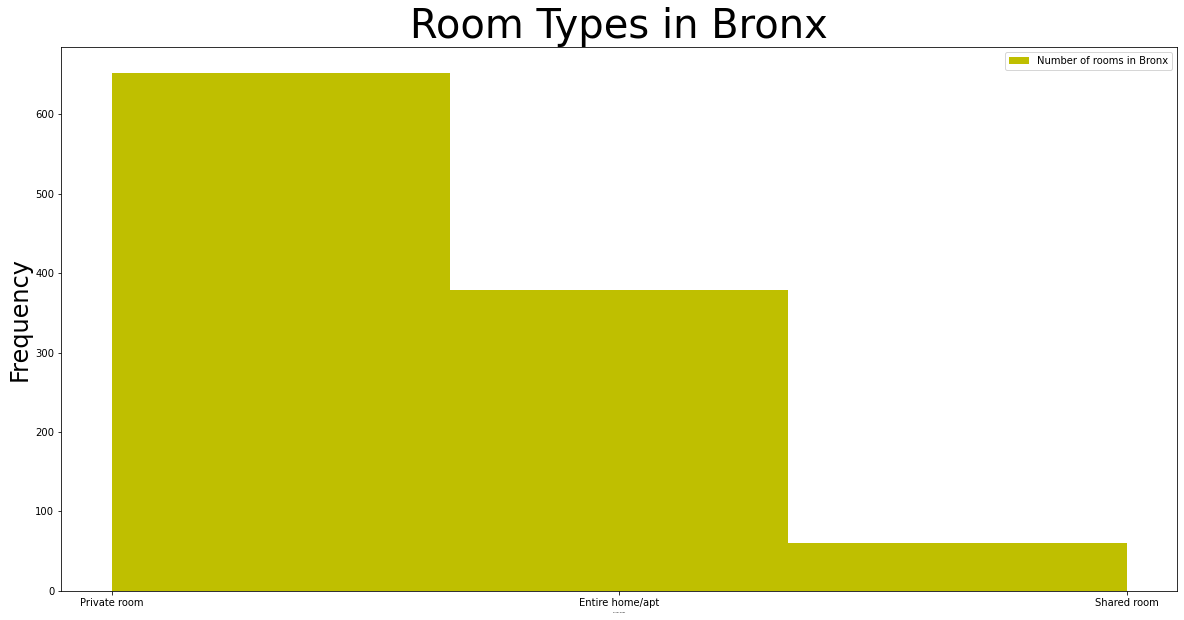

In [213]:
# bar chart showing the number of room types in the Bronx
# def room_type():

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(airbnb[airbnb['neighborhood_group']=='Bronx']['room_type'], bins=3, label = 'Number of rooms in Bronx', color='y')
ax.set_xlabel('Room Types', fontsize=2)
ax.set_ylabel('Frequency', fontsize=24)
plt.title('Room Types in Bronx', fontsize=40)
ax.legend()

plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --